In [31]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime as dt
import pickle
import math
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [32]:
df=pd.read_csv('../dataset/train_data1.csv')

In [33]:
df=df.drop(['air_store_id','reserve_visitors','diff_day'],axis=1)

In [34]:
df1=df.dropna()
df1.set_index('store_id_date',drop=True,inplace=True)

In [41]:
df1=df1.sample(500)

In [42]:
print(df1.shape)
df1.head()

(500, 33)


,visitors,year,month,day,season,day_of_week,working_day,holiday_flg,air_genre_name,air_area_name,...,max_working_day,max_holiday_flg,max_season,median_year,median_month,median_day,median_day_of_week,median_working_day,median_holiday_flg,median_season
store_id_date,,,,,,,,,,,,,,,,,,,,,
air_db1233ad855b34d5_2016-10-26,22.0,0,10,26,3,3,0,0,7,18,...,109.0,114.0,114.0,35.0,27.0,35.5,24.0,29.0,32.0,32.0
air_7cc17a324ae5c7dc_2017-02-15,2.0,1,2,15,0,3,0,0,6,27,...,62.0,65.0,62.0,15.5,15.0,15.5,6.0,6.0,14.0,16.0
air_f690c42545146e0a_2016-12-16,45.0,0,12,16,0,5,0,0,8,23,...,48.0,48.0,47.0,7.0,12.0,7.0,14.0,8.0,8.0,8.0
air_d500b48a8735fbd3_2016-12-26,19.0,0,12,26,0,1,0,0,7,58,...,29.0,36.0,28.0,25.0,25.0,19.0,18.0,25.0,26.0,25.0
air_3bb99a1fe0583897_2016-04-28,31.0,0,4,28,1,4,0,0,7,32,...,72.0,73.0,65.0,38.5,37.0,34.5,35.0,39.0,39.0,39.5


In [43]:
X = df1.drop('visitors', axis=1).as_matrix()
y = df1['visitors']

#データをわける
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)

In [44]:
#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [47]:
# Grid Search
#parameterの設定
params={'n_estimators':[200,300,400], 
                'max_depth':[5,15,20], #確定
                'criterion':['mse'],
                'random_state':[1],
                'n_jobs':[-1]
}

#モデルの設定
rf_model=RandomForestRegressor()

#指標の設定
rmslescoring=make_scorer(rmsle)

#gridsearch
gs = GridSearchCV(rf_model,params,scoring=rmslescoring)
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'random_state': [1], 'max_depth': [12], 'n_estimators': [300], 'n_jobs': [-1], 'criterion': ['mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(rmsle), verbose=0)

In [48]:
y_test_pred = gs.predict(X_test)
y_train_pred =gs.predict(X_train)
gs.best_params_

{'criterion': 'mse',
 'max_depth': 12,
 'n_estimators': 300,
 'n_jobs': -1,
 'random_state': 1}

In [49]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_test_pred))
print(mean_squared_error(y_train,y_train_pred))

106.316881052
19.059557193


In [50]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.936177047506
0.600494641012


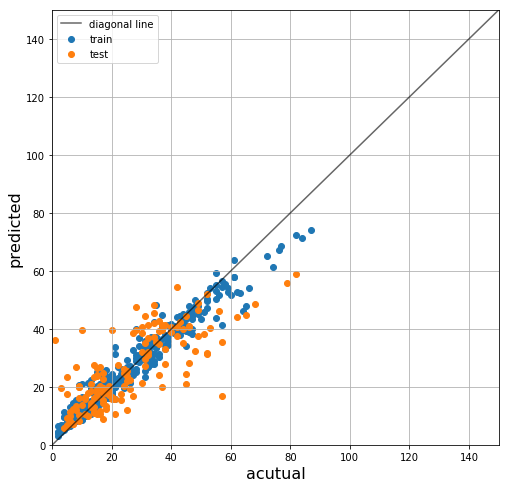

In [51]:
u_lim=150
l_lim=0
plt.figure(figsize=(8, 8))
plt.plot([l_lim,u_lim], [l_lim,u_lim], c='k', alpha=0.6, label = 'diagonal line') # diagonal line
plt.scatter(y_train,y_train_pred,label='train')
plt.scatter(y_test,y_test_pred,label='test')
plt.xlim(l_lim,u_lim)
plt.ylim(l_lim,u_lim)
plt.xlabel('acutual', fontsize=16)
plt.ylabel('predicted', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [126]:
with open('rf.pickle', mode='wb') as f:
    pickle.dump(gs, f)

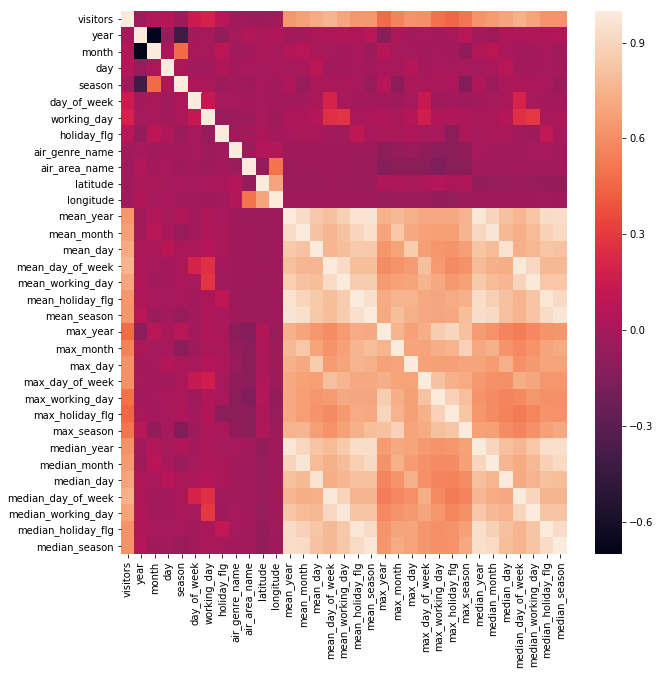

In [127]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())
plt.show()